**Set up modules and database connection**

In [1]:
import configparser
import psycopg2
import pandas as pd
import seaborn as sns
config = configparser.ConfigParser()
config.read('config.ini')
conn = psycopg2.connect(
        host = config['postgres']['host'],
        dbname = config['postgres']['dbname'],
        user = config['postgres']['user']
    )

**Pull data from database**

In [2]:
stock_sql="""
     SELECT *
     FROM reit_data_combined
    """
data = pd.read_sql_query(stock_sql, conn)
conn.close()

**As expected, Yield goes down as PE goes up**

<AxesSubplot:xlabel='pe', ylabel='yield'>

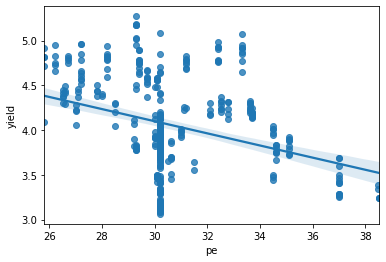

In [3]:
sns.regplot(y=data['yield'],x=data['pe'])

**In last 5 years, PE centered around 30-32**

<AxesSubplot:xlabel='pe'>

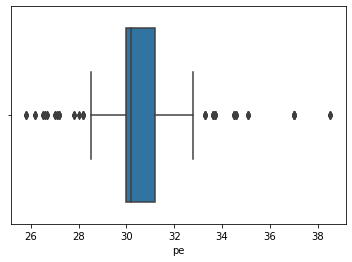

In [4]:
sns.boxplot(x=data['pe'])

**Current PE is 20% over typical, and highest ever**

<AxesSubplot:xlabel='date'>

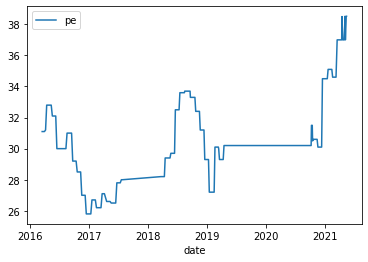

In [5]:
data_date_pe = data[['date','pe']]
data_date_pe = data_date_pe[data_date_pe['pe'].notna()]
data_date_pe.plot.line(x='date', y='pe')

**Price is lower when 10Y interest rates are higher**

<AxesSubplot:xlabel='dgs10', ylabel='avg_price'>

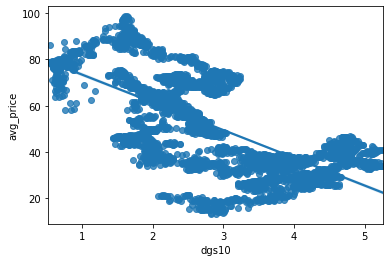

In [6]:
data_dgs_price = data[['dgs10','avg_price']]
data_dgs_price = data_dgs_price[data_dgs_price['avg_price'].notna()]
data_dgs_price = data_dgs_price[data_dgs_price['dgs10'].notna()]
sns.regplot(x=data_dgs_price['dgs10'],y=data_dgs_price['avg_price'])

**Price is higher when there is higher CPI**

<AxesSubplot:xlabel='cpiaucsl', ylabel='avg_price'>

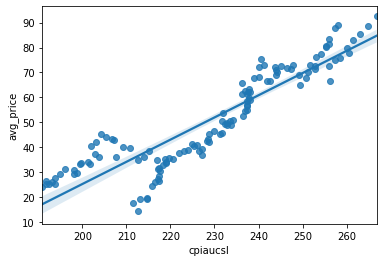

In [7]:
data_cpi_price = data[['cpiaucsl','avg_price']]
data_cpi_price = data_cpi_price[data_cpi_price['avg_price'].notna()]
data_cpi_price = data_cpi_price[data_cpi_price['cpiaucsl'].notna()]
sns.regplot(x=data_cpi_price['cpiaucsl'],y=data_cpi_price['avg_price'])

**Price is mostly higher when House Starts are high**

<AxesSubplot:xlabel='houst', ylabel='avg_price'>

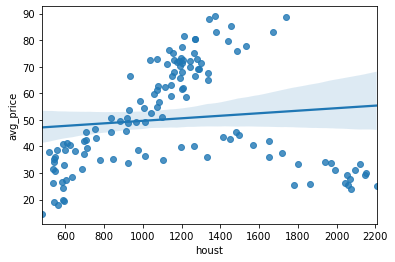

In [8]:
data_house_price = data[['houst','avg_price']]
data_house_price = data_house_price[data_house_price['avg_price'].notna()]
data_house_price = data_house_price[data_house_price['houst'].notna()]
sns.regplot(x=data_house_price['houst'],y=data_house_price['avg_price'])

**Price is higher when Money Supply is higher**

<AxesSubplot:xlabel='mabmm301usm189s', ylabel='avg_price'>

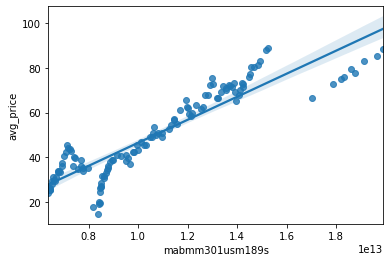

In [9]:
data_money_price = data[['mabmm301usm189s','avg_price']]
data_money_price = data_money_price[data_money_price['avg_price'].notna()]
data_money_price = data_money_price[data_money_price['mabmm301usm189s'].notna()]
sns.regplot(x=data_money_price['mabmm301usm189s'],y=data_money_price['avg_price'])

**The current PE is not correlated with the future change in price**

<AxesSubplot:xlabel='pe', ylabel='future_price'>

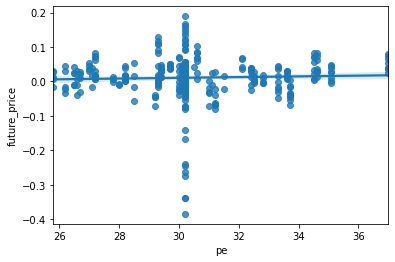

In [11]:
data_pe_price = data[['future_price','pe']]
data_pe_price = data_pe_price[data_pe_price['pe'].notna()]
data_pe_price = data_pe_price[data_pe_price['future_price'].notna()]
sns.regplot(x=data_pe_price['pe'],y=data_pe_price['future_price'])

**The housing starts are not correlated with the future change in price**

<AxesSubplot:xlabel='houst', ylabel='future_price'>

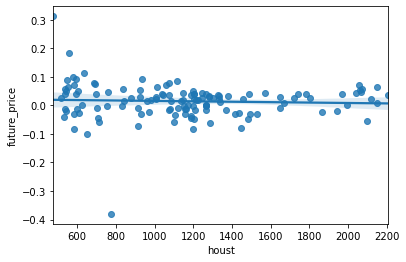

In [12]:
data_house_futureprice = data[['houst','future_price']]
data_house_futureprice = data_house_futureprice[data_house_futureprice['future_price'].notna()]
data_house_futureprice = data_house_futureprice[data_house_futureprice['houst'].notna()]
sns.regplot(x=data_house_futureprice['houst'],y=data_house_futureprice['future_price'])